In [4]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
from matplotlib import offsetbox
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
digits = load_digits()

X_digits = digits.data

# campioni: 1797
# dimens.:    64 (immagine 8x8)

y_digits = digits.target

# classi:     10 (le cifre da 0 a 9)+

In [3]:
digits_df = pd.DataFrame(X_digits)
digits_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


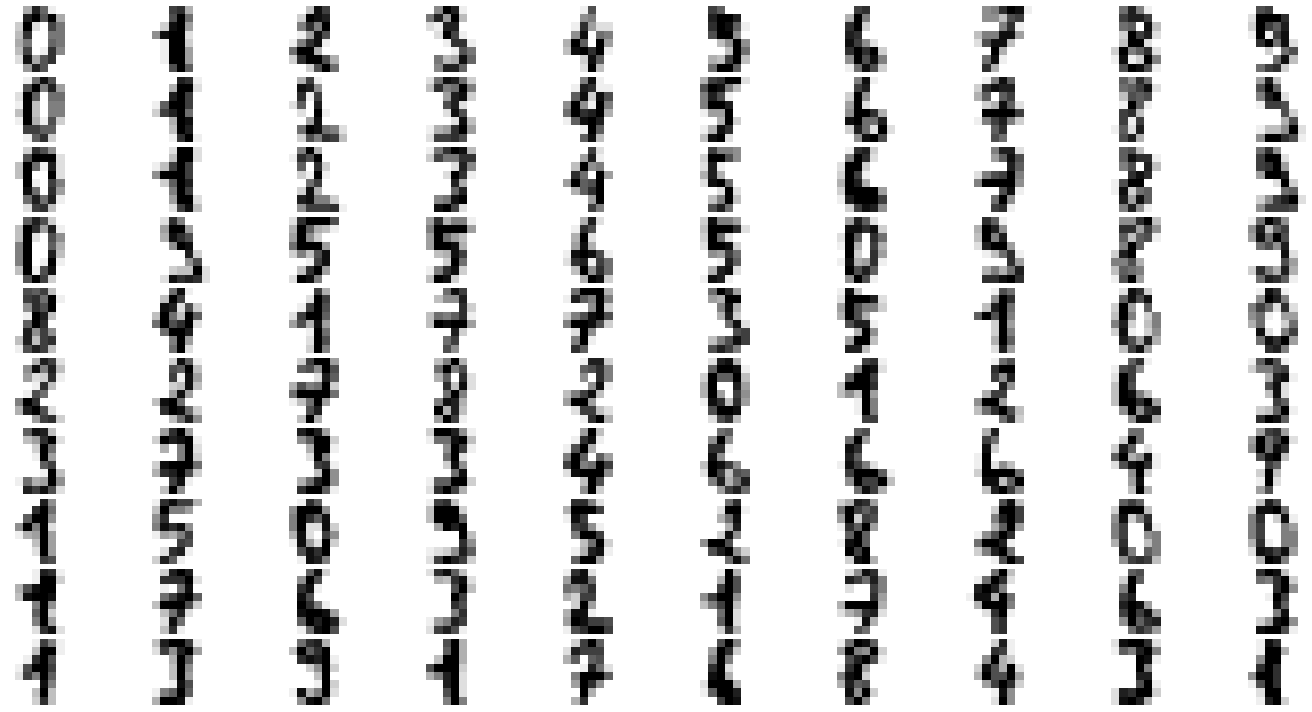

In [4]:
# mostro qualche cifra nel dataset (100)

matplotlib.rcParams['figure.figsize'] = [20, 10]

fig, ax_array = plt.subplots(10, 10)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap=plt.cm.binary)

plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [6]:
def disegna_1(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 15})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            # per avere il quadratino con il numero
            # ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    plt.title("LLE", fontsize=24);


def disegna_2(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title(title, fontsize=24);

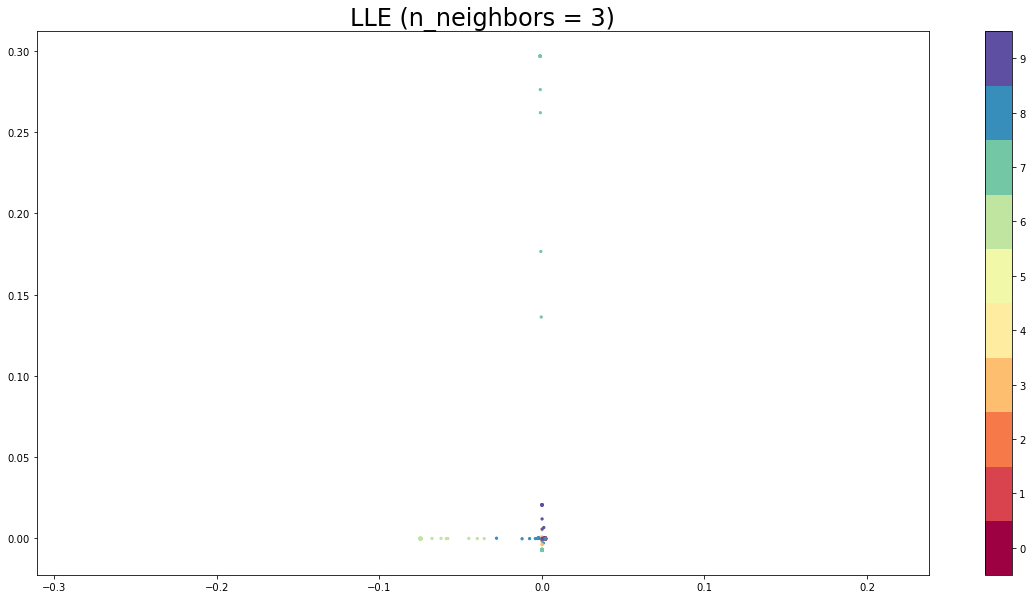

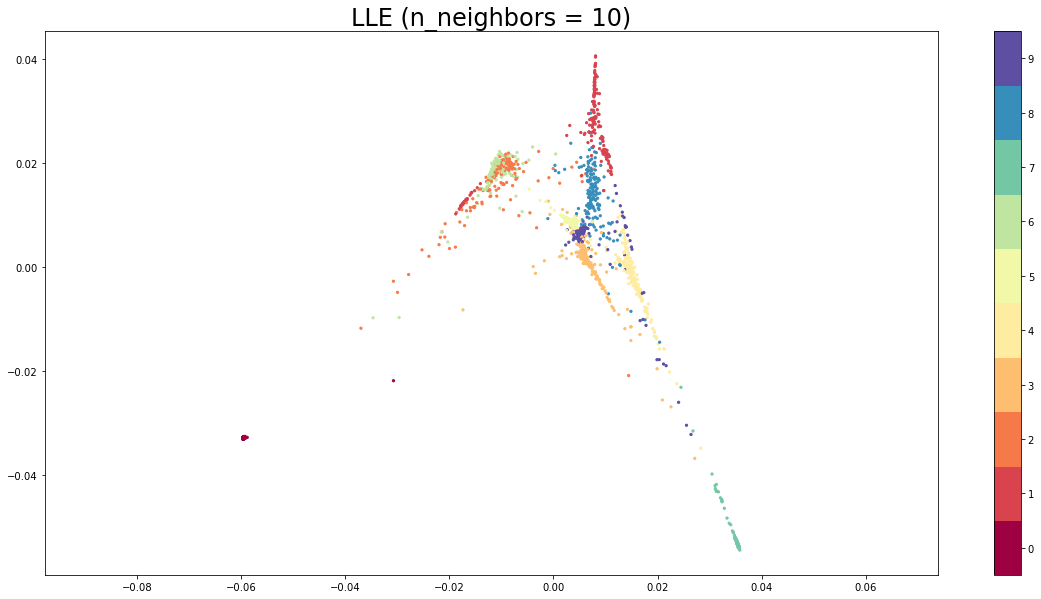

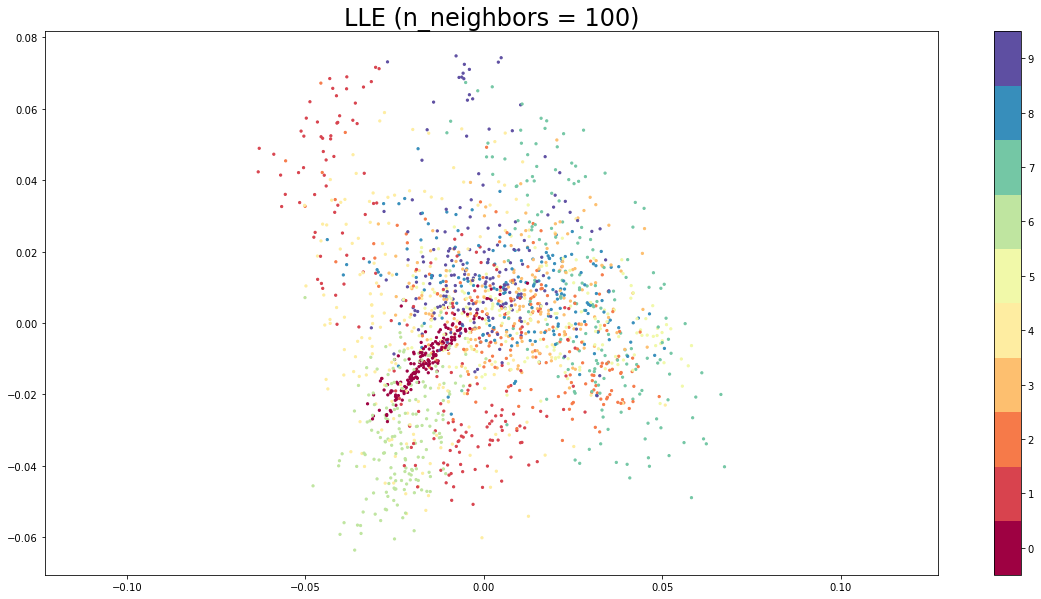

In [19]:
embedding_a = LocallyLinearEmbedding(n_neighbors=3)

digits_lle_a = embedding_a.fit_transform(X_digits)
# print("a:", digits_lle_a.shape)

disegna_2(digits_lle_a, y_digits, title="LLE (n_neighbors = 3)")
plt.show()

# -------------------------------------------------

embedding_b = LocallyLinearEmbedding(n_neighbors=10)

digits_lle_b = embedding_b.fit_transform(X_digits)
# print("b:", digits_lle_b.shape)

disegna_2(digits_lle_b, y_digits, title="LLE (n_neighbors = 10)")
plt.show()

# -------------------------------------------------

embedding_c = LocallyLinearEmbedding(n_neighbors=100)

digits_lle_c = embedding_c.fit_transform(X_digits)
# print("c:", digits_lle_c.shape)

disegna_2(digits_lle_c, y_digits, title="LLE (n_neighbors = 100)")
plt.show()

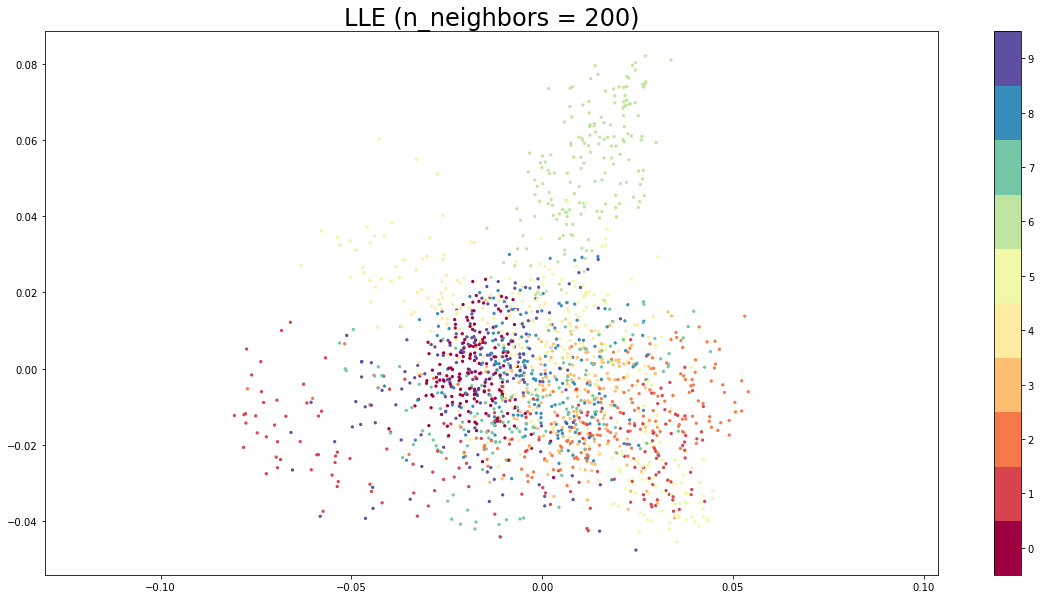

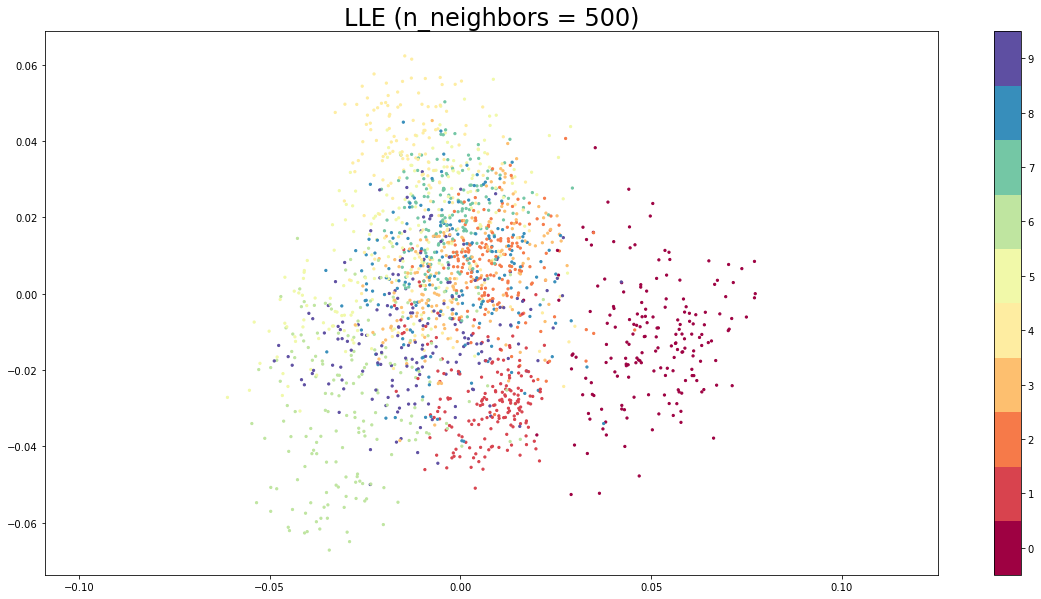

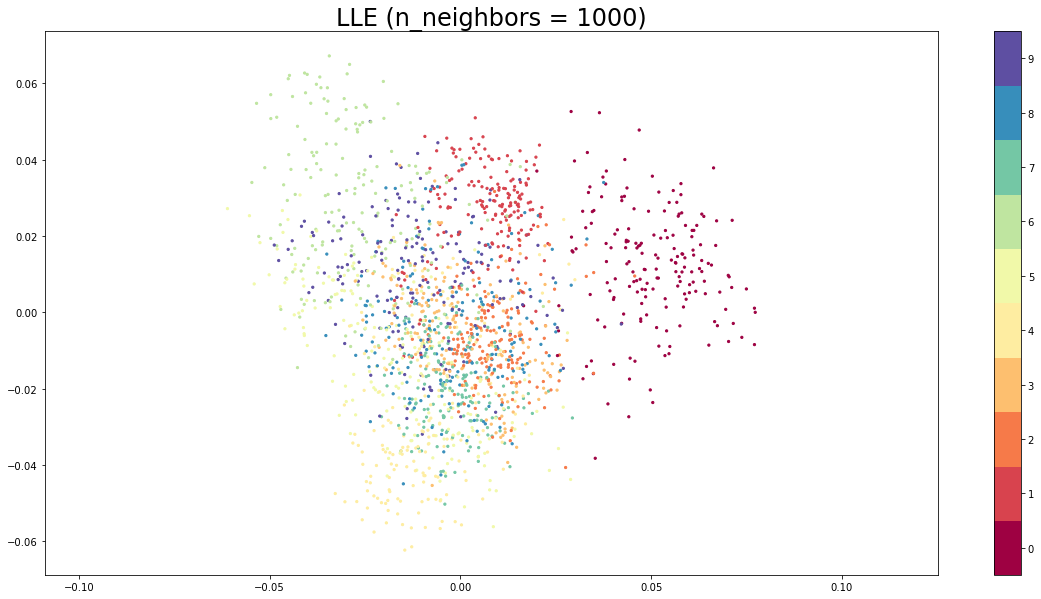

In [20]:
embedding_d = LocallyLinearEmbedding(n_neighbors=200)

digits_lle_d = embedding_d.fit_transform(X_digits)
# print("d:", digits_lle_d.shape)

disegna_2(digits_lle_d, y_digits, title="LLE (n_neighbors = 200)")
plt.show()

# -------------------------------------------------

embedding_d = LocallyLinearEmbedding(n_neighbors=500)

digits_lle_d = embedding_d.fit_transform(X_digits)
# print("d:", digits_lle_d.shape)

disegna_2(digits_lle_d, y_digits, title="LLE (n_neighbors = 500)")
plt.show()

# -------------------------------------------------

embedding_e = LocallyLinearEmbedding(n_neighbors=1000)

digits_lle_e = embedding_d.fit_transform(X_digits)
# print("e:", digits_lle_d.shape)

disegna_2(digits_lle_e, y_digits, title="LLE (n_neighbors = 1000)")
plt.show()

# -------------------------------------------------

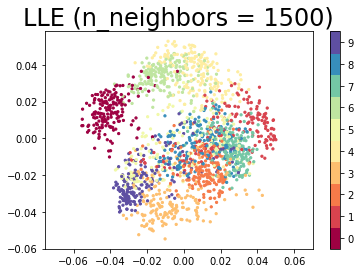

tempo:  148.04285979270935


In [7]:
import time
startTime = time.time()

embedding_f = LocallyLinearEmbedding(n_neighbors=1500)

digits_lle_f = embedding_f.fit_transform(X_digits)
# print("f:", digits_lle_d.shape)

disegna_2(digits_lle_f, y_digits, title="LLE (n_neighbors = 1500)")
plt.show()

tempo = time.time() - startTime
print("tempo: ", tempo)

# -------------------------------------------------

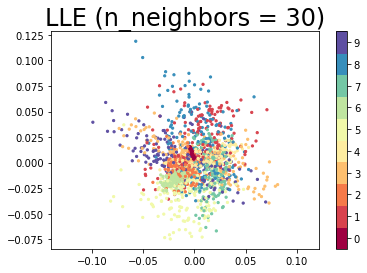

In [11]:
embedding_g = LocallyLinearEmbedding(n_neighbors=30)

digits_lle_g = embedding_g.fit_transform(X_digits)
# print("g:", digits_lle_d.shape)

disegna_2(digits_lle_g, y_digits, title="LLE (n_neighbors = 30)")
plt.show()

In [10]:
def elabora_lle(x):
    embedding = LocallyLinearEmbedding(n_neighbors=x)
    digits_lle = embedding.fit_transform(X_digits)
    
    titleee = "LLE (n_neighbors = " + str(x) + ")"
    disegna_2(digits_lle, y_digits, title=titleee)

In [11]:
interact(elabora_lle, x=widgets.IntSlider(min=5, max=1755, step=100, value=30))

interactive(children=(IntSlider(value=30, description='x', max=1755, min=5, step=100), Output()), _dom_classes…

<function __main__.elabora_lle(x)>

e: (1797, 3)


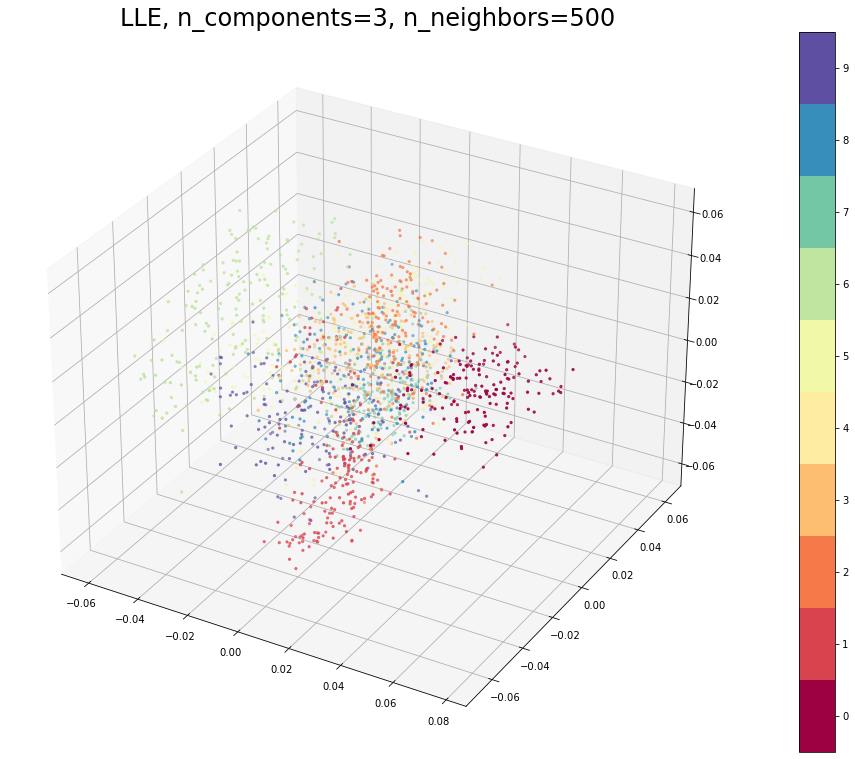

In [23]:
embedding_e = LocallyLinearEmbedding(n_neighbors=500, n_components=3)

digits_lle_e = embedding_e.fit_transform(X_digits)
print("e:", digits_lle_e.shape)

# -------------------------------------------------

fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(digits_lle_e[:, 0], digits_lle_e[:, 1], digits_lle_e[:, 2], c=y_digits, cmap='Spectral', s=5)

fig.colorbar(p, boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title("LLE, n_components=3, n_neighbors=500", fontsize=24)
plt.show()

# Locally Linear Embedding (LLE)

(Roweis & Saul, 2000) <br>
LLE è un metodo per la riduzione della dimensionalità, che può essere usato per manifold embedding e feature extraction. <br>
Mira a preservare la struttura dei dati: punti vicini nello spazio iniziale saranno essere vicini anche nello spazio finale, puntando anche ad allontanare ulteriormente i punti lontani. <br>
LLE funziona molto bene quando si analizzano pattern curvi, o in generale non lineari, in quanto sfrutta la vicinanza tra i dati.

![caption](files/fig_1.png)

*Esempio di riduzione della dimensionalità da 2 a 1, basata sui vicini.*

LLE si può suddividere in 3 step:
 1. Trovare il k-Nearest Neighbors (kNN) graph di tutti i punti in questione
 2. Trovare i pesi per poter ricostruire ogni punto in base ai suoi vicini, usando una combinazione lineare (linear reconstruction)
 3. Usando gli stessi pesi, fare l'embedding di ogni punto basandosi su una combinazione lineare dell'embedding dei suoi vicini (linear embedding)

L'idea principale di LLE è usare gli stessi pesi sia nello spazio ad alta dimensionalità (input) che in quello a bassa dimensionalità (output).

![caption](files/fig_2.png)

$ n $ : numero dei dati <br>
$ d $ : dimensione iniziale <br>
$ p $ : dimensione finale, solitamente $ p << d $ <br>
<br>

Dati originali (input): $ \large \{  x_i \in \mathbb R^d \}^n_{i=1} $ <br>
Dati finali (output): $ \large \{ y_i \in \mathbb R^p \}^n_{i=1} $ <br> 
<br>

$ k $ : numero dei vicini da considerare <br>

## ( 1 ) k-Nearest Neighbors

Un grafo dei vicini (kNN graph) è formato usando la distanza euclidea tra coppie di punti, quindi ogni punto avrà $ k $ vicini.
<br>

Indichiamo con $ \large x_{ij} \in \mathbb R^d $ il j-esimo vicino di $ x_i $ <br>
e i vicini di $ x_i $ con $ \large \mathbf X_i := [ x_{i1}, \dots, x_{ik} ] \quad ( d \times k ) $ <br>

Per non appesantire la notazione, indicheremo con $ \large \mathcal N_i $ i vicini del punto $ x_i $


## ( 2 ) Linear reconstruction by the neighbors

L'obiettivo di questo step è trovare i pesi per la linear reconstruction di ogni punto a partire dai suoi kNN. <br>

Vogliamo esprimere $ x_i $ come somma pesata dei suoi $ k $ vicini

$$
\large x_i \approx \sum_{j \in \mathcal N_i}w_{ij}x_j
$$

La somma dei i pesi $ w_{ij} $ relativi a un punto deve essere uguale ad 1, così da rendere possibili successive semplificazioni.

$$
\large \sum_{j \in \mathcal N_i}w_{ij} = 1, \quad \forall i \in {1, \dots, n}
$$

Indichiamo con $ \mathbf w_i $ i $ k $ pesi relativi al punto $ x_i $

$$
\large \mathbf w_i = \begin{bmatrix} w_{i1} \\ \vdots \\ w_{ik} \end{bmatrix} \quad ( k \times 1 )
$$

Per trovare i pesi corretti, dobbiamo minimizzare:

$$
\large \textrm{minimize: }\quad \left\| x_i - \sum_{j \in \mathcal N_i}w_{ij}x_j \right\|^2
$$

Dichiariamo ora una nuova matrice nella quale prendo i vicini di $ x_i $ e gli sottraggo $ x_i $:
$$
\large \mathbf Z_i \leftarrow \begin{bmatrix} (x_1 - x_i) & \dots & (x_j - x_i) & \dots & (x_k - x_i) \end{bmatrix}
\quad ( d \times k )
$$

Dopo alcuni passaggi operando con matrici si arriva finalmente a trovare $ \mathbf w_i $, ovvero i pesi relativi a $ x_i $:

$$
\large \mathbf w_i = \dfrac{\mathbf G_i^{-1}\mathbf 1}{\mathbf 1^\top \mathbf G_i^{-1}\mathbf 1}
$$

, dove $ \large \mathbf G_i $ è una matrice di Gram (simmetrica reale) così ottenuta $ \large \mathbf G_i = \mathbf Z_i^\top \mathbf Z_i \quad ( k \times k )$
<br>

Ogni punto è ora ricostruibile usando i pesi.

in sintesi, possiamo riassumere quello che abbiamo fatto fin ora in questo modo:

- abbiamo in input i nostri $ n $ punti
- per ogni $ x_i $ :
  - trovo $ \mathcal N_i $
  - $ \mathbf Z_i \leftarrow \begin{bmatrix} \dots & x_j - x_i & \dots \end{bmatrix} $
  - $ \mathbf G_i \leftarrow \mathbf Z_i^\top \mathbf Z_i $
  - $ \mathbf w_i \leftarrow \dfrac{\mathbf G_i^{-1}\mathbf 1}{\mathbf 1^\top \mathbf G_i^{-1}\mathbf 1} $


## ( 3 ) Linear embedding

Nel secondo step abiamo trovato i pesi per la linear reconstruction, quindi non abbiamo più bisogno degli input. 
Fissiamo i pesi e cerchiamo $ \mathbf y_i $, ovvero le coordinate di dimensionalità ridotta. <br>
Lo scopo è quindi di "embeddare" i dati in uno spazio dimensionale più piccolo usando gli stessi pesi dello spazio di input. <br>

Come con le $ x_i $, vogliamo esprimere $ y_i $ come somma pesata dei suoi $ k $ vicini

$$
\large y_i \approx \sum_{j \in \mathcal N_i}w_{ij}y_j
$$

Definiamo la matrice dei pesi $ \large \mathbf W \quad ( n \times n ) $

$$
\large
   w_{ij} =
    \left\{
    \begin{array}{ll}
       0 & \mbox{se } j = i\\
       w_{ij} & \mbox{se } j \in \mathcal N_i\\
       0 & \mbox{se } j \not\in \mathcal N_i
    \end{array}
   \right.
$$

La riga i-esima di $ \mathbf W $ rappresenta i pesi dell' i-esimo punto.
Ogni riga ha $ n $ valori, alcuni dei quali posti a zero, eccetto nelle $ k $ colonne corrispondenti al vicinato di $ x_i $ ( $ \mathcal N_i $ ); inoltre la somma di ogni riga è uguale a 1, per via della condizione posta all'inizio del calcolo dei pesi.


Definiamo la matrice delle coordinate $ \mathbf Y $ :

$$
\large \mathbf Y = \begin{bmatrix} y_1 & \dots & y_n \end{bmatrix}^\top \quad ( n \times p )
$$

Ogni riga $ \mathbf Y_i $ è l'embedding nello spazio ridotto del punto, trasposto ($ p $ dimensionale)


Abbiamo un problema di ottimizzazione, in cui vogliamo minimizzare, al fine di ottenere $ \mathbf Y $:

$$
\large \textrm{minimize: }\quad \sum_{i} \left\| y_i - \sum_{j \in \mathcal N_i}w_{ij}x_y \right\|^2
$$

Abbiamo 2 vincoli da rispettare (per rendere possibili i passaggi matematici del procedimento):

$$
\large \dfrac{1}{n} \sum_{i} y_i y_i^\top = \mathbf I \\
\large \sum_{i} y_i = \mathbf 0
$$

Consideriamo infine la matrice $ \mathbf M $:

$$
\large \mathbf M = ( \mathbf I - \mathbf W )^\top ( \mathbf I - \mathbf W )
$$

Di essa calcoliamo autovalori e autovettori, che saranno le colonne della matrice finale (a ridotta dimensionalità).<br><br>
Dato che il problema originario era di minimizzazione, dovremo prima ordinare gli autovettori in base al relativo autovalore (dal più piccolo al più grande).
Ignoriamo il primo (avendo autovalore pari a zero) e consideriamo i successivi $ p $ autovettori con autovalori non nulli, che saranno le colonne di 
$ \large \mathbf Y \in \mathbb R^{n \times p} $

Riassumendo, l'algoritmo LLE funziona nel seguente modo:

- abbiamo in input i nostri $ n $ punti
- per ogni $ x_i $ :
  - trovo $ \mathcal N_i $
  - $ \mathbf Z_i \leftarrow \begin{bmatrix} \dots & x_j - x_i & \dots \end{bmatrix} $
  - $ \mathbf G_i \leftarrow \mathbf Z_i^\top \mathbf Z_i $
  - $ \mathbf w_i \leftarrow \dfrac{\mathbf G_i^{-1}\mathbf 1}{\mathbf 1^\top \mathbf G_i^{-1}\mathbf 1} $
- troviamo la matrice dei pesi $ \mathbf W $
- $ \mathbf M \leftarrow ( \mathbf I - \mathbf W )^\top ( \mathbf I - \mathbf W ) $
- troviamo autovettori $ \mathbf v_1 \dots \mathbf v_n $ della matrice $ \mathbf M $, ordinati in base all'autovalore
- $ \mathbf Y \leftarrow \begin{bmatrix} \mathbf v_1 & \dots & \mathbf v_n \end{bmatrix} $
  